In [2]:
import pandas as pd
df= pd.read_csv(r"C:\Users\Shivani\OneDrive\Desktop\sem2 set dataset\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
col_names=df.iloc[:,:9]

In [7]:
col_names

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

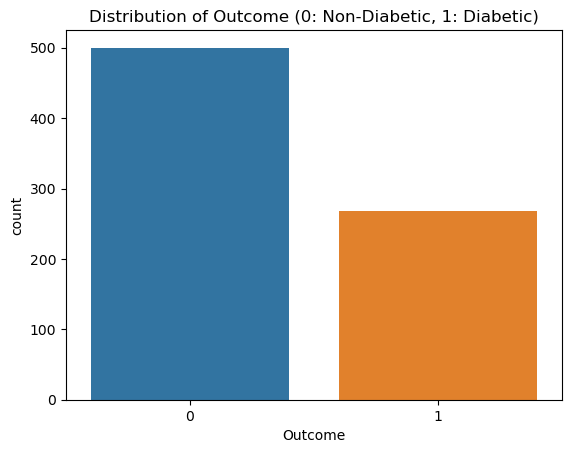

In [11]:
# Distribution of the target variable (Outcome) to check whether the class is imbalanced or not

sns.countplot(df['Outcome'])
plt.title('Distribution of Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.show()

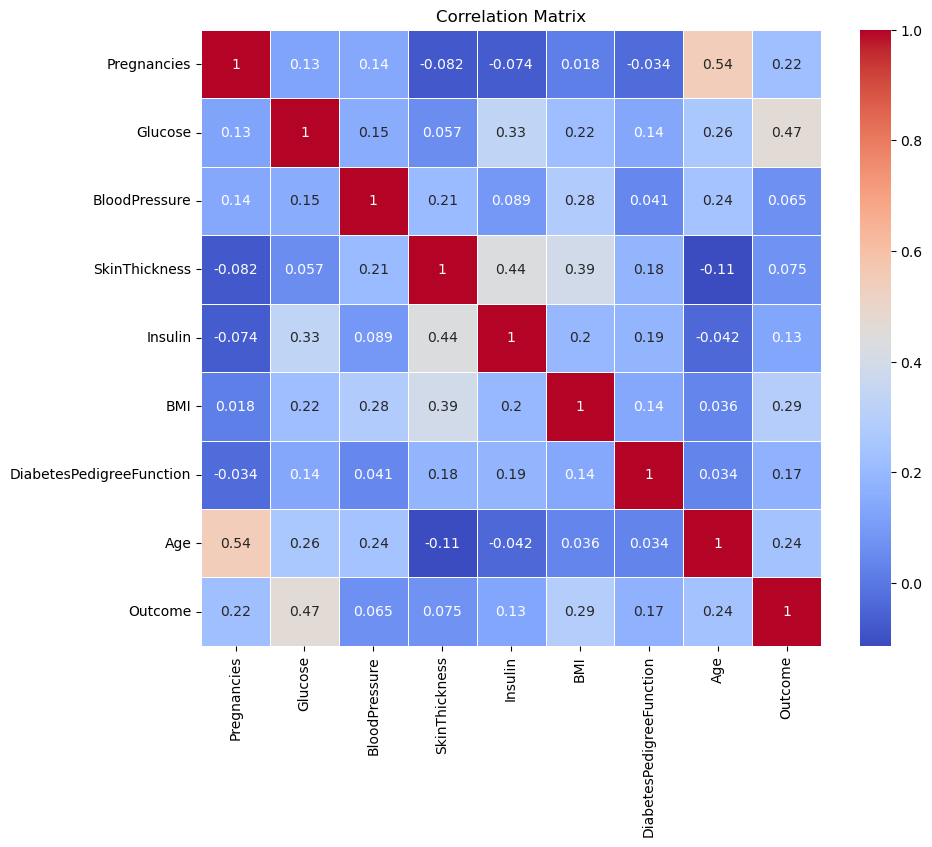

In [13]:
#Correlation matrix (Heatmap) to check multicollinearity between the features
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

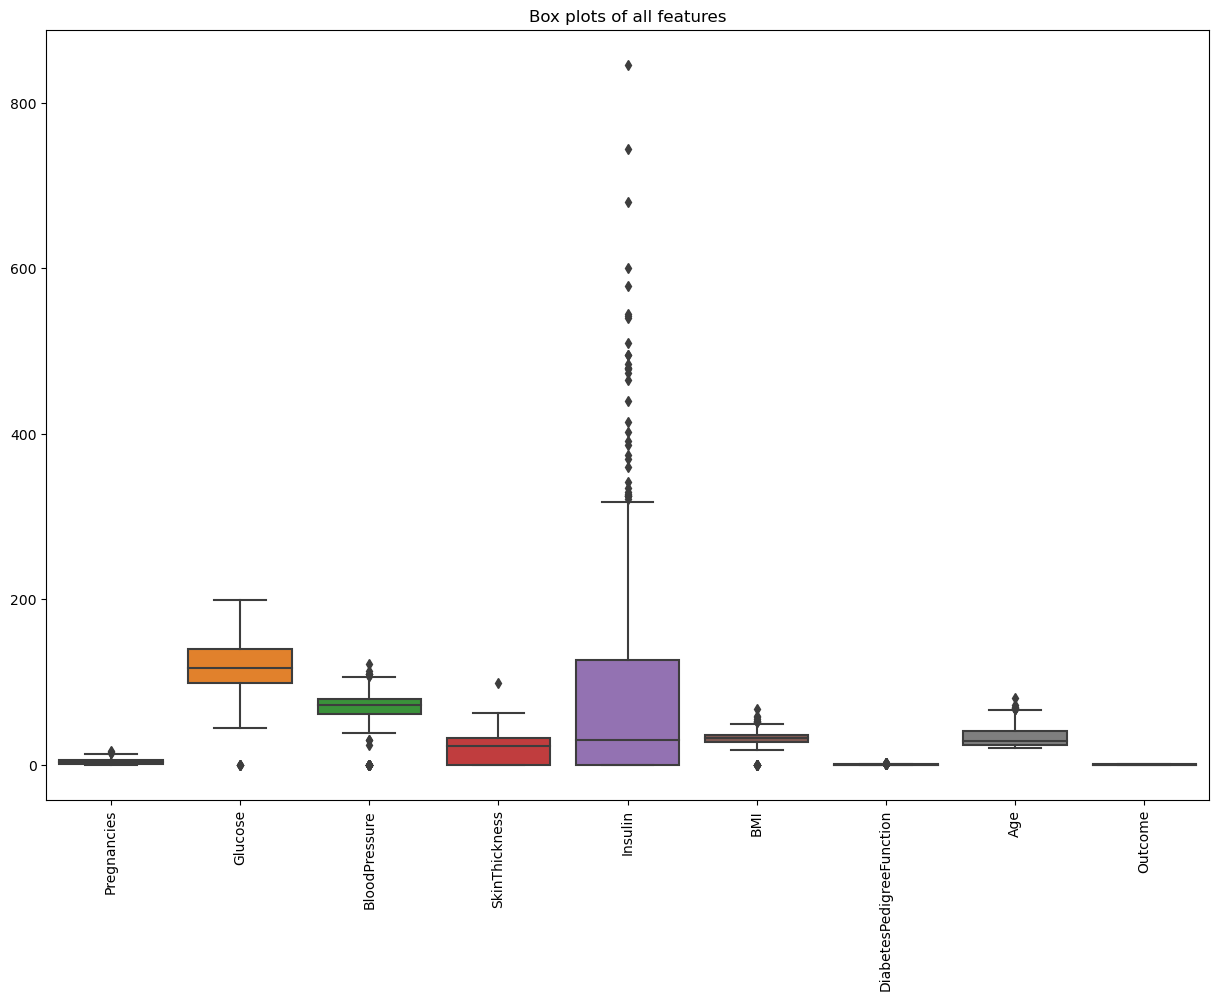

In [14]:
# Box plots for each feature to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box plots of all features')
plt.xticks(rotation=90)
plt.show()

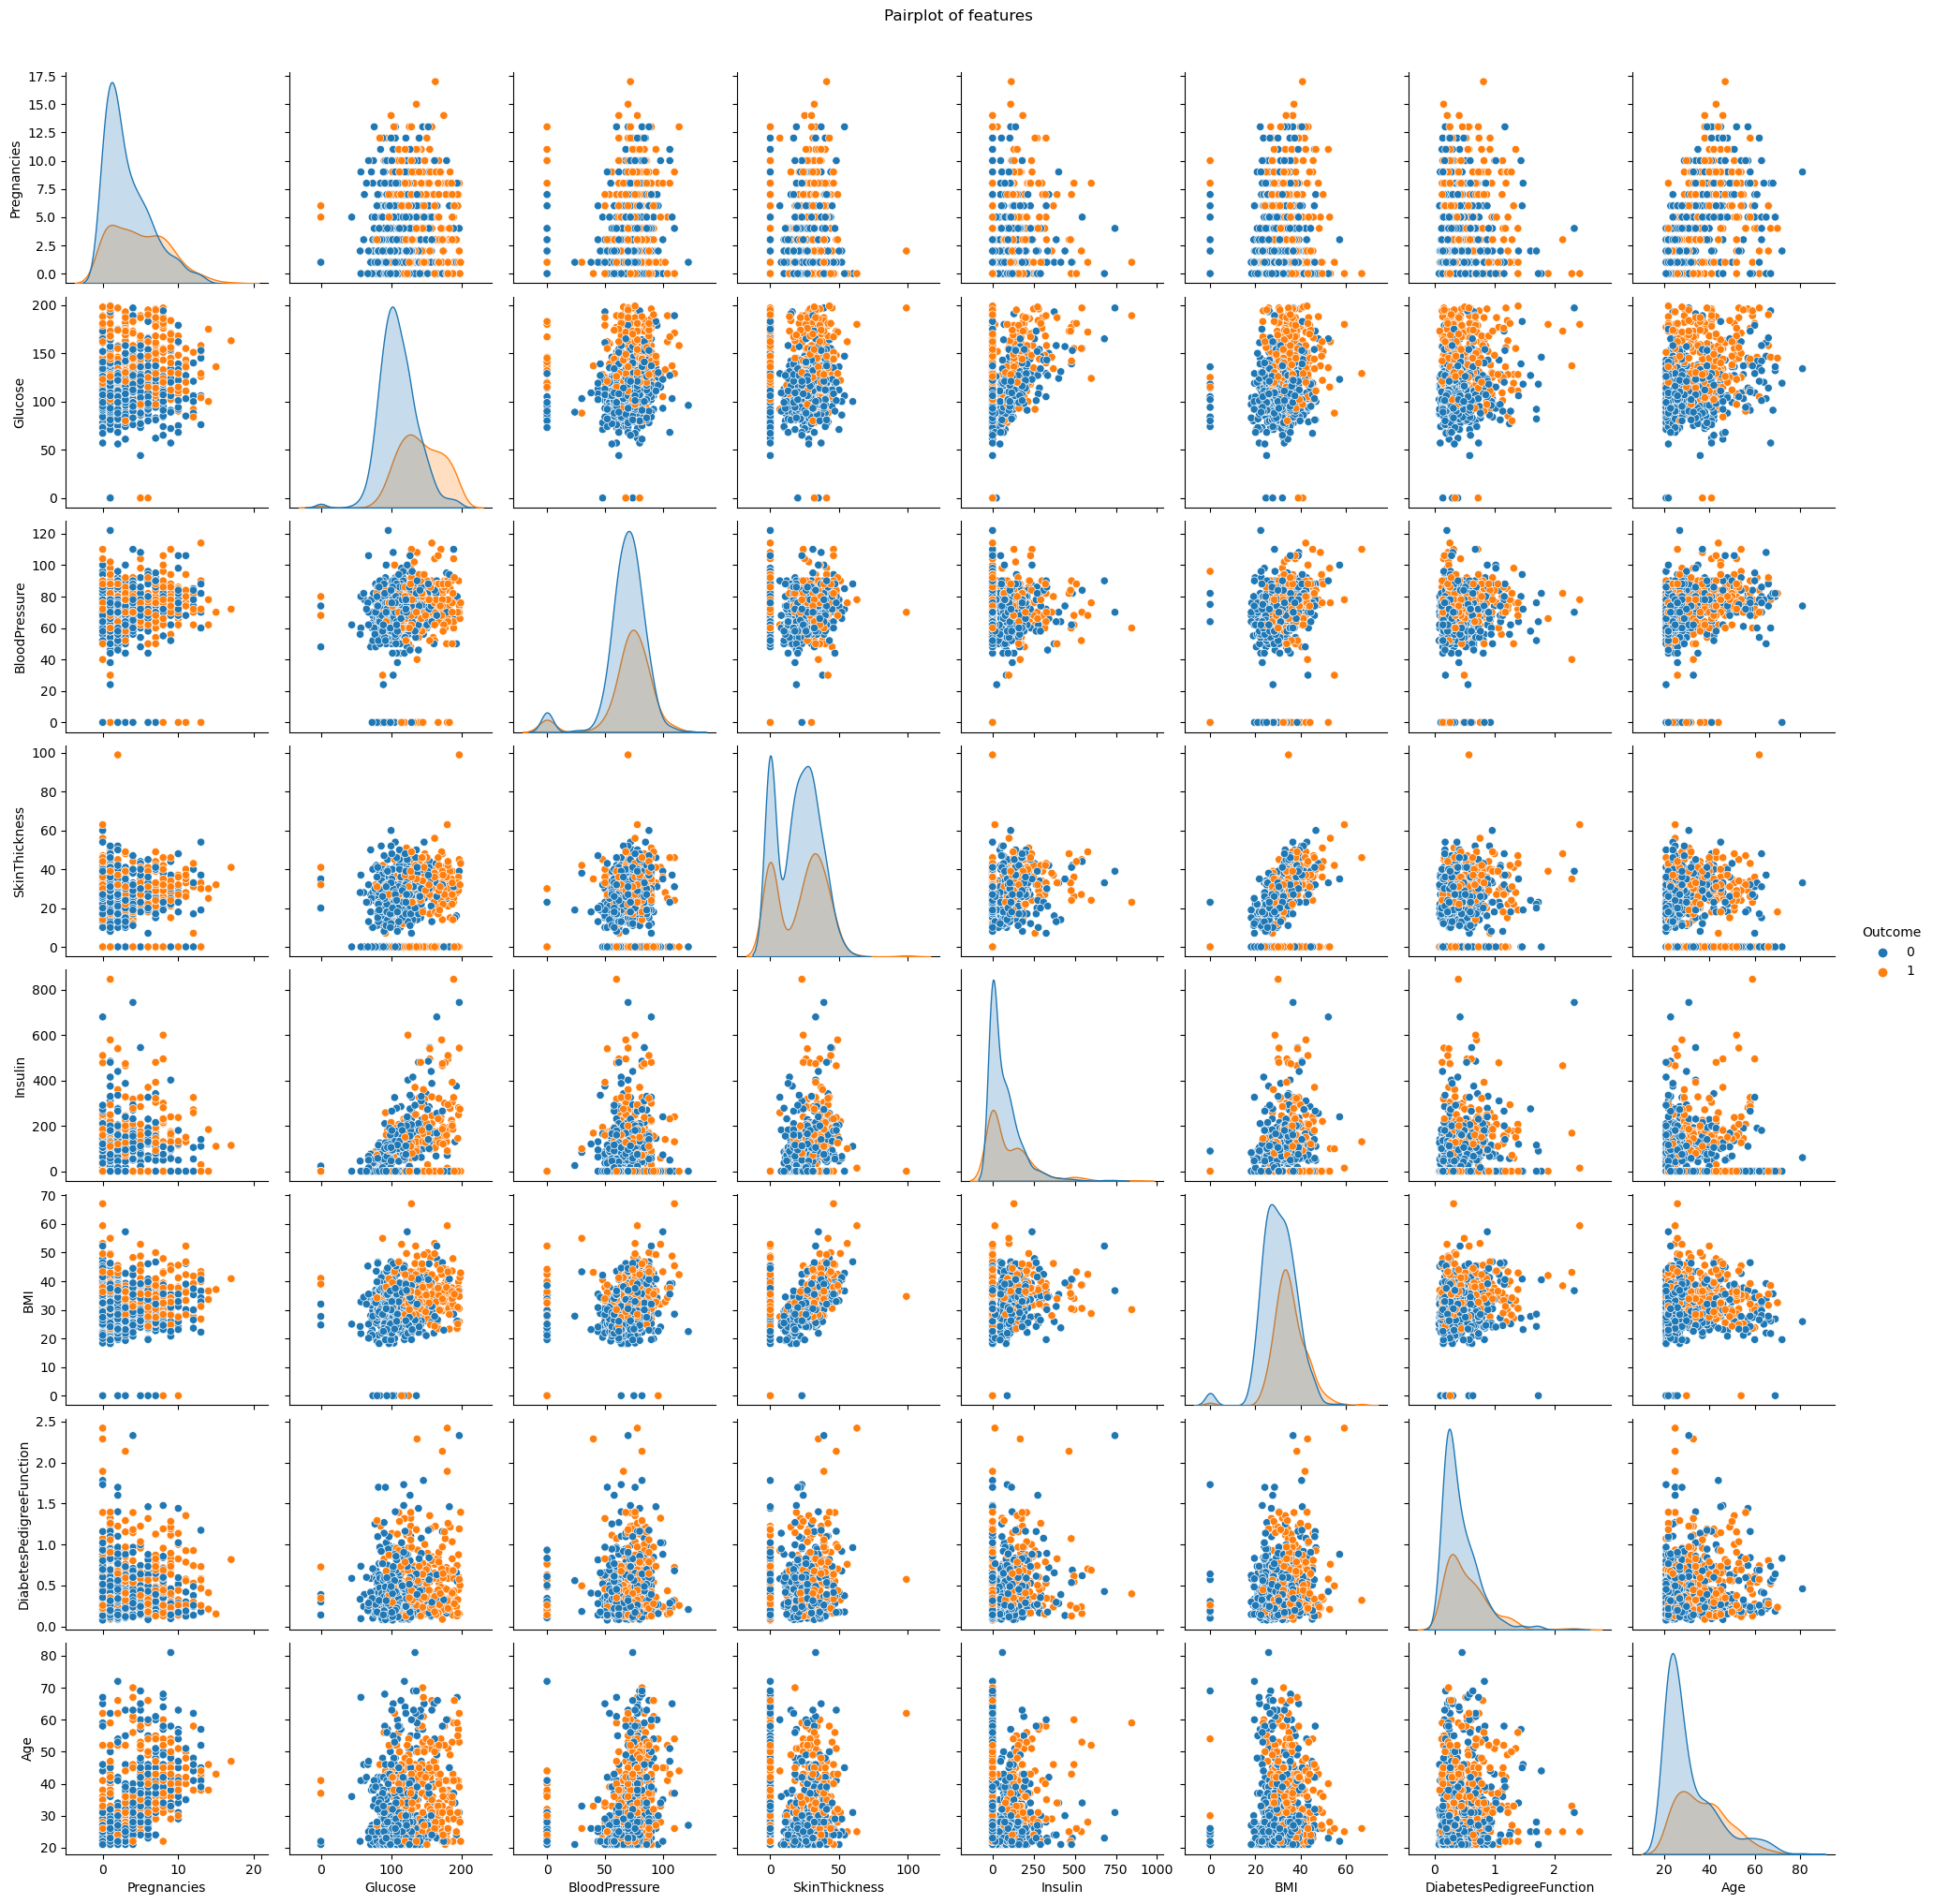

In [15]:
# 8. Pairplot to analyze pairwise relationships between features and the target variable
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplot of features', y=1.02)
plt.show()

In [16]:
zero=(df.iloc[:,1:8]==0).sum()
zero

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [17]:
#since the above columns cannot have zero values we are changing them
import numpy as np
df.iloc[:,1:8]=df.iloc[:,1:8].replace(0,np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
df.Glucose=df["Glucose"].fillna(df["Glucose"].mean())

In [19]:
df.BloodPressure=df.BloodPressure.fillna(df.BloodPressure.mean())

In [20]:
df.SkinThickness=df.SkinThickness.fillna(df.SkinThickness.mean())

In [21]:
df.Insulin=df.Insulin.fillna(df.Insulin.mean())

In [22]:
df.BMI=df.BMI.fillna(df.BMI.mean())

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
139,5,105.0,72.0,29.0,325.000000,36.9,0.159,28,0
720,4,83.0,86.0,19.0,155.548223,29.3,0.317,34,0
612,7,168.0,88.0,42.0,321.000000,38.2,0.787,40,1
541,3,128.0,72.0,25.0,190.000000,32.4,0.549,27,1
94,2,142.0,82.0,18.0,64.000000,24.7,0.761,21,0
55,1,73.0,50.0,10.0,155.548223,23.0,0.248,21,0
352,3,61.0,82.0,28.0,155.548223,34.4,0.243,46,0
326,1,122.0,64.0,32.0,156.000000,35.1,0.692,30,1
187,1,128.0,98.0,41.0,58.000000,32.0,1.321,33,1
291,0,107.0,62.0,30.0,74.000000,36.6,0.757,25,1


In [25]:
#checking if it is imbalanced or not
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [26]:
X=df.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [27]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

[[70 29]
 [16 39]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



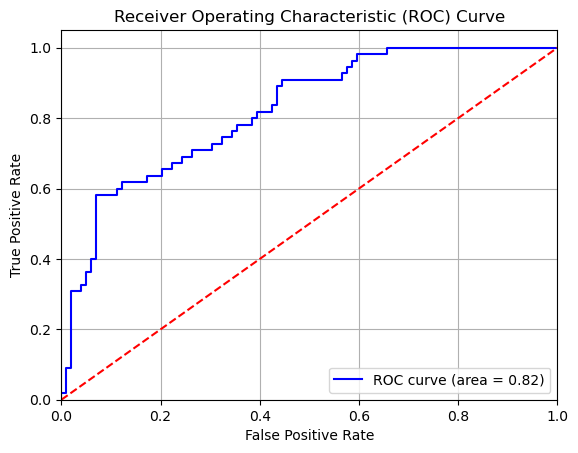

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming X and y are defined
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model with class weights
model = LogisticRegression(class_weight='balanced')

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [10]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Alternatively, suppress only specific warnings
# warnings.filterwarnings("ignore", category=UserWarning)  # Example for UserWarnings


In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = LogisticRegression()

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type
    'class_weight': [None, 'balanced']  # Class weights
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='f1',  # Using F1 score for evaluation
                           cv=5,          # 5-fold cross-validation
                           verbose=2,     # Print detailed logs
                           n_jobs=-1)     # Use all available cores

# Fit Grid Search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
print("Best Hyperparameters:", grid_search.best_params_)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
[[70 29]
 [16 39]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best SVM Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 0.7207792207792207
[[68 31]
 [12 43]]
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        99
           1       0.58      0.78      0.67        55

    accuracy                           0.72       154
   macro avg       0.72      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



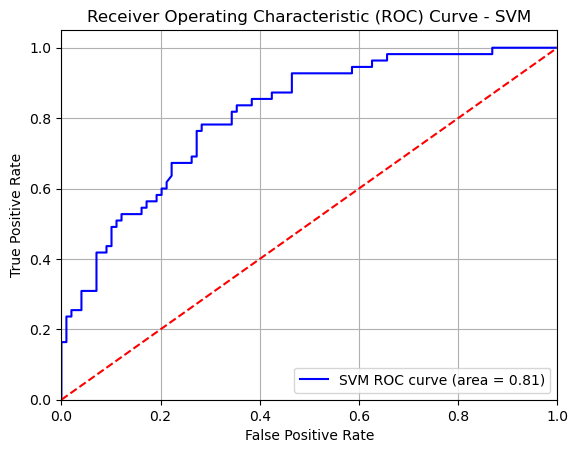

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Accuracy: 0.7597402597402597
[[74 25]
 [12 43]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        99
           1       0.63      0.78      0.70        55

    accuracy                           0.76       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154



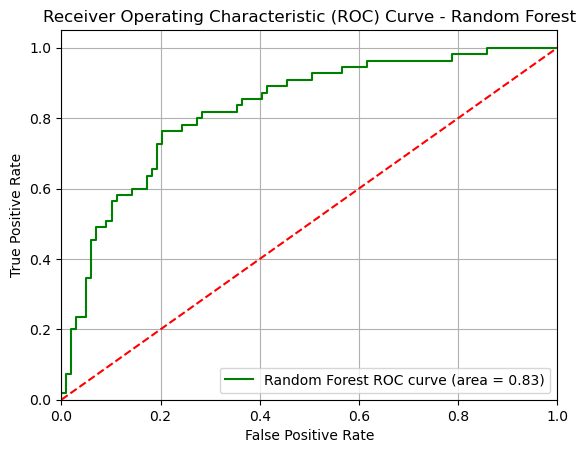

In [31]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load your dataset
# Assuming 'df' is your dataset and 'Outcome' is the target column
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine Classifier
svm_model = SVC(class_weight='balanced', probability=True)  # Enable probability estimates

# Define the parameter grid for Grid Search for SVM
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernels to try
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’
}

# Initialize GridSearchCV for SVM
svm_grid_search = GridSearchCV(estimator=svm_model, 
                                param_grid=svm_param_grid, 
                                scoring='f1', 
                                cv=5, 
                                verbose=2, 
                                n_jobs=-1)

# Fit Grid Search on the training data for SVM
svm_grid_search.fit(X_train_scaled, y_train)

# Get the best model from Grid Search for SVM
best_svm_model = svm_grid_search.best_estimator_

# Make predictions on the test set using SVM
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Evaluate the SVM model
print("Best SVM Hyperparameters:", svm_grid_search.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# ROC Curve for SVM
y_scores_svm = best_svm_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curve for SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced')  # Use class weights to handle class imbalance

# Define the parameter grid for Grid Search for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, 
                               param_grid=rf_param_grid, 
                               scoring='f1', 
                               cv=5, 
                               verbose=2, 
                               n_jobs=-1)

# Fit Grid Search on the training data for Random Forest
rf_grid_search.fit(X_train, y_train)

# Get the best model from Grid Search for Random Forest
best_rf_model = rf_grid_search.best_estimator_

# Make predictions on the test set using Random Forest
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# ROC Curve for Random Forest
y_scores_rf = best_rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [32]:
pip install xgboost

     -------------------------------------- 124.9/124.9 MB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best XGBoost Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
XGBoost Accuracy: 0.7402597402597403
[[69 30]
 [10 45]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.78        99
           1       0.60      0.82      0.69        55

    accuracy                           0.74       154
   macro avg       0.74      0.76      0.73       154
weighted avg       0.78      0.74      0.75       154



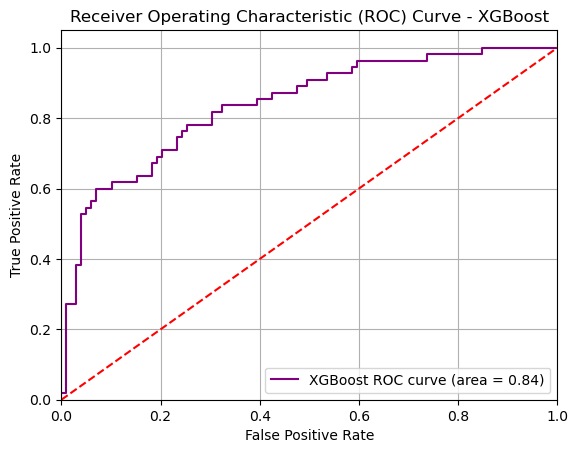

In [32]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load your dataset
# Assuming 'df' is your dataset and 'Outcome' is the target column
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier with class weights
xgb_model = XGBClassifier(scale_pos_weight=len(y[y == 0]) / len(y[y == 1]), eval_metric='mlogloss', use_label_encoder=False)

# Define the parameter grid for Grid Search
xgb_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7, 9],  # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.5, 0.7, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.5, 0.7, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Initialize GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, 
                                param_grid=xgb_param_grid, 
                                scoring='f1', 
                                cv=5, 
                                verbose=2, 
                                n_jobs=-1)

# Fit Grid Search on the training data
xgb_grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_xgb_model = xgb_grid_search.best_estimator_

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("Best XGBoost Hyperparameters:", xgb_grid_search.best_params_)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# ROC Curve for XGBoost
y_scores_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve for XGBoost
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='purple', label='XGBoost ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()
